In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("urldata.csv")
# data = data.sample(frac=0.1)

In [3]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["Label"].unique()
for i in data.columns:
    if(i== "Domain"):
        data[i]= label_encoder.fit_transform(data[i])

In [5]:
X_train , X_test , y_train , y_test = train_test_split(data[['Have_IP' , 'Have_At' , 'URL_Length' , 
                                                             'URL_Depth' ,'Redirection' , 
                                                             'https_Domain' , 'TinyURL' , 'Prefix/Suffix'
                                                             , 'DNS_Record', 'Web_Traffic' , 'Domain_Age' , 'Domain_End' , 'iFrame' , 'Mouse_Over' , 'Right_Click' , 
                                                            'Web_Forwards']] , data['Label'] , train_size=0.2)

In [6]:
X_train

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
9088,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0
1999,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
386,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0
6223,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0
7464,0,0,0,3,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0
870,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
3841,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
1330,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0


In [7]:
y_train

9088    1
1999    0
386     0
6223    1
7464    1
       ..
1751    0
870     0
3841    0
1330    0
2782    0
Name: Label, Length: 2000, dtype: int64

In [8]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,1364,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,1027,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,1499,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1162,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,1513,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
mymodel.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_predict = mymodel.predict(X_test)

In [10]:
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
feature_df = data[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data["Label"])
X.shape

(10000, 16)

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.85  0.84  0.87  0.82  0.84  0.85  0.86  0.825 0.805 0.85 ]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    3.5s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    4.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.7s finished

[2022-11-20 17:22:43] Features: 1/16 -- score: 0.7266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.9s finished

[2022-11-20 17:22:46] Features: 2/16 -- score: 0.7757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.8s finished

[2022-11-20 17:22:49] Features: 3/16 -- score: 0.795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wor

(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15)


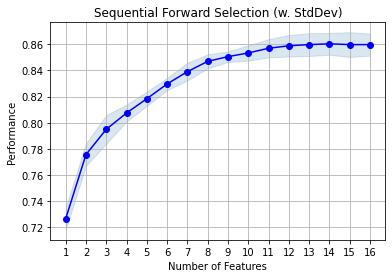

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 16), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [14]:
data1 = data.sample(frac=0.1)

X_train , X_test , y_train , y_test = train_test_split(data1[['Have_IP' , 'Have_At' , 'URL_Length' , 
                                                             'URL_Depth' ,'Redirection' , 
                                                             'https_Domain' , 'TinyURL' , 'Prefix/Suffix'
                                                             , 'DNS_Record', 'Web_Traffic' , 'Domain_Age' , 'Domain_End' , 'iFrame' , 'Mouse_Over' , 'Right_Click' , 
                                                            'Web_Forwards']] , data1['Label'] , train_size=0.2)

from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
mymodel.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_predict = mymodel.predict(X_test)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
feature_df = data1[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data1["Label"])

from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
data1.head(4)

Cross-Validation Accuracy Scores [0.55 0.85 0.6  0.8  0.75 0.75 0.65 0.8  0.75 0.85]


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
7505,2229,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,1
2245,3186,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
5755,1094,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1
5011,1746,0,0,0,3,0,0,0,0,0,1,0,0,0,0,1,0,1


0.844


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    4.4s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.6s finished

[2022-11-20 15:15:59] Features: 1/16 -- score: 0.7270000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.8s finished

[2022-11-20 15:16:02] Features: 2/16 -- score: 0.774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.5s finished

[2022-11-20 15:16:04] Features: 3/16 -- score: 0.792[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 con

(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15)


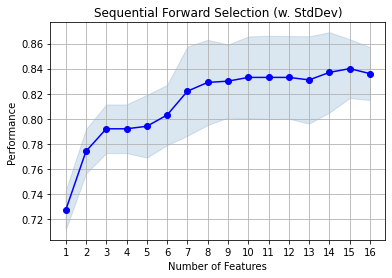

In [16]:
df1 = data.sample(frac=0.1)
df1.head()
feature_df = df1[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(df1["Label"])
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
scores = cross_val_score(mymodel, X, Y, cv=10, scoring='accuracy')
print(scores.mean())
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 16), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

0.8514999999999999


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    1.1s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished

[2022-11-20 17:23:26] Features: 1/16 -- score: 0.7295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.9s finished

[2022-11-20 17:23:28] Features: 2/16 -- score: 0.774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.0s finished

[2022-11-20 17:23:30] Features: 3/16 -- score: 0.7870000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 co

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished

[2022-11-20 17:23:47] Features: 16/16 -- score: 0.8515

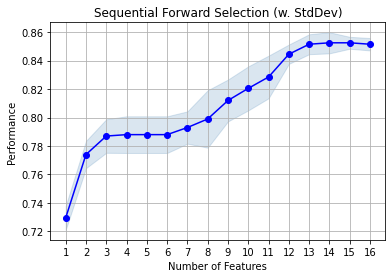

In [14]:
df1 = data.sample(frac=0.2)
df1.head()
feature_df = df1[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(df1["Label"])
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
scores = cross_val_score(mymodel, X, Y, cv=10, scoring='accuracy')
print(scores.mean())
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 16), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

0.8596999999999999


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    2.2s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    2.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.8s finished

[2022-11-17 18:36:55] Features: 1/16 -- score: 0.7266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.0s finished

[2022-11-17 18:36:59] Features: 2/16 -- score: 0.7757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.5s finished

[2022-11-17 18:37:04] Features: 3/16 -- score: 0.795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wor

(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15)


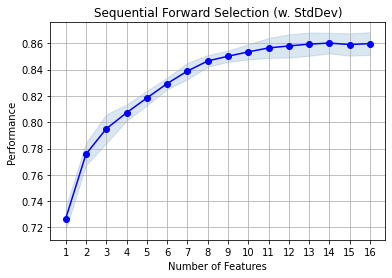

In [18]:
df1 = data.sample(frac=0.5)
df1.head()
feature_df = data[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data["Label"])
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
scores = cross_val_score(mymodel, X, Y, cv=10, scoring='accuracy')
print(scores.mean())
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 16), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

0.8593999999999999


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    2.1s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    2.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.6s finished

[2022-11-20 15:03:07] Features: 1/16 -- score: 0.7266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.1s finished

[2022-11-20 15:03:11] Features: 2/16 -- score: 0.7757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.8s finished

[2022-11-20 15:03:15] Features: 3/16 -- score: 0.795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wor

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15)


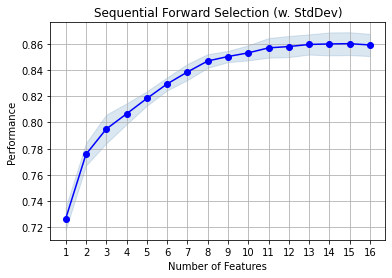

In [15]:
df1 = data.sample(frac=0.05)
df1.head()
feature_df = data[["Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data["Label"])
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier(n_estimators = 100) 
scores = cross_val_score(mymodel, X, Y, cv=10, scoring='accuracy')
print(scores.mean())
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 16), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()